#### Gambler’s Problem

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money.

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. This problem can be formulated as an undiscounted, episodic, finite MDP.

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}. The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.use('Agg')

- Initialization

In [2]:
GOAL = 100 # The goal of our agent
STATES = np.arange(GOAL + 1) # all states, including state 0 and state 100

#### Value Iteration Algorithm 
- Implement value iteration for the gambler’s problem and solve it for Probability of the coin coming up heads = {0.4, 0.25, 0.55}

In [3]:
def value_iteration_for_gamblers(p_h, theta):
    '''
    Value iteration
    
    Args:
    p_h : Probability of the coin coming up heads.
    
    Return:
    Optimal state value and optimal policy
    
    '''
    
    state_value = np.zeros(GOAL + 1)    # Initialize state_value
    state_value[GOAL] = 1.0             # The reward is zero on all transitions except those on which 
                                        #the gambler reacheshis goal when it is:+1 
    sweeps_history = []

    policy = np.zeros(GOAL + 1)         # Initialize deterministic policy.
    
    # Optimal state_value
    
    while True:
        delta = 0    # Stopping condition
        
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)
        
        for state in STATES[1:GOAL]:
            # get possilbe actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []
            for action in actions:
                action_returns.append(p_h * state_value[state + action] + (1 - p_h) * state_value[state - action])
            new_value = np.max(action_returns)
            state_value[state] = new_value
        delta = abs(state_value - old_state_value).max()
        if delta < theta:
            sweeps_history.append(state_value)
            break
            
    # Optimal Policy
    
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(p_h * state_value[state + action] + (1 - p_h) * state_value[state - action])
        
        
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]
    
    return sweeps_history, policy

###### Value iteration for p_h = 0.4

In [23]:
H_0, P_0 = value_iteration_for_gamblers(0.4, theta=0.000000000001)

print("Optimal Policy:")
print(P_0)
print("")

print("Optimal Value Function:")
print(H_0[len(H_0)-1])
print("")

Optimal Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.  7.  6.  5.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Optimal Value Function:
[0.         0.00206562 0.00516406 0.00922547 0.01291015 0.0173854
 0.02306368 0.02781411 0.03227539 0.03768507 0.0434635  0.05035447
 0.05765919 0.06523937 0.06953528 0.07443124 0.08068847 0.08661104
 0.09421268 0.10314362 0.10865874 0.11596663 0.12588617 0.13357998
 0.14414799 0.16       0.16309844 0.16774609 0.17383821 0.17936523
 0.1860781  0.19459552 0.20172117 0.20841308 0.21652761 0.22519525
 0.2355317  0.24648879 0.25785906 0.26430292 0.27164686 0.2810327
 0.28991657 0.30131902 0.31471544 0.32298812 0.33394994 0.34882926
 0.36036996 0.

###### Show the results graphically

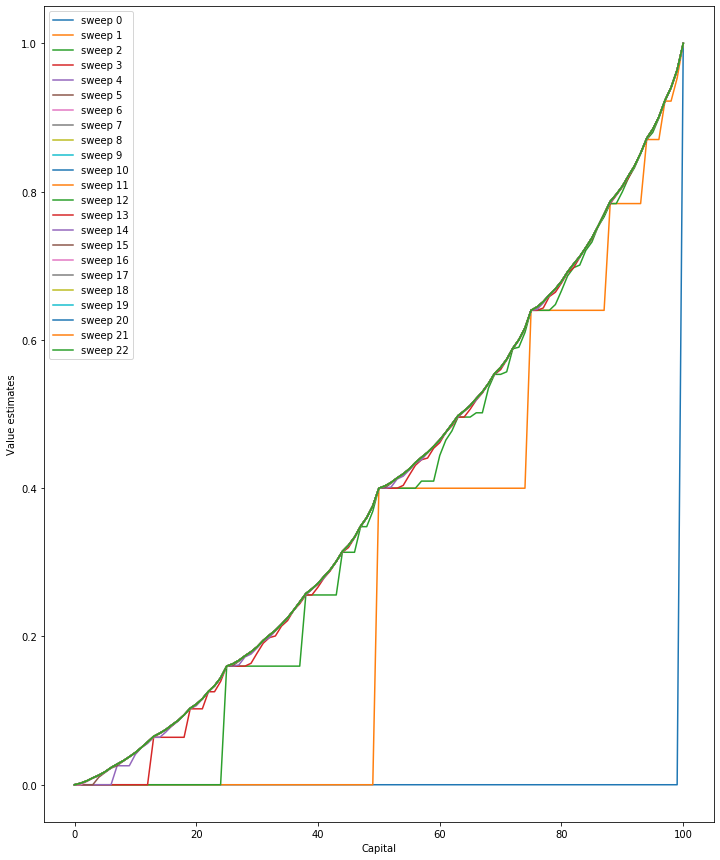

In [24]:
plt.figure(figsize=(12, 15))

for sweep, state_value in enumerate(H_0):
    plt.plot(state_value, label='sweep {}'.format(sweep))
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='best')

plt.show()

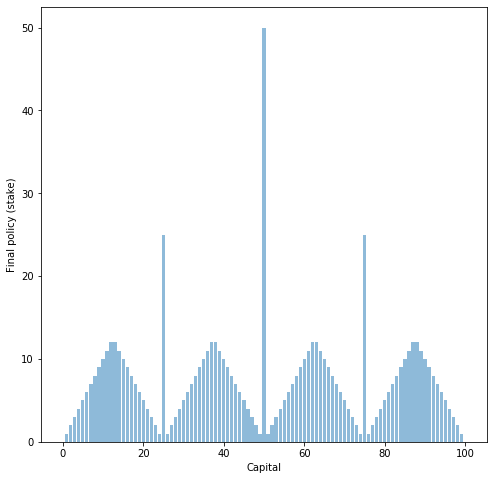

In [25]:
plt.figure(figsize=(8, 8))
plt.bar(STATES, P_0, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')

plt.show()

###### Value iteration for p_h = 0.24

In [19]:
H_1, P_1 = value_iteration_for_gamblers(0.24, theta=0.0001)

print("Optimal Policy:")
print(P_1)
print("")

print("Optimal Value Function:")
print(H_1[len(H_1)-1])
print("")

Optimal Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9.  8.
  7.  6.  5.  4.  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 12. 11. 10.  9.  8.  7.  6. 45.  4.  3.  2.  1. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 10.  9.  8.  7.  6. 20.  4.
  3.  2.  1. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.  0.]

Optimal Value Function:
[0.00000000e+00 4.58647142e-05 2.25960159e-04 5.45913403e-04
 9.41500662e-04 1.44804679e-03 2.30182340e-03 3.41454362e-03
 3.92291942e-03 4.73238067e-03 6.03352830e-03 7.75559578e-03
 9.59093083e-03 1.38588572e-02 1.42388942e-02 1.49245156e-02
 1.64190531e-02 1.74206093e-02 1.97182528e-02 2.43567315e-02
 2.51666318e-02 2.70636631e-02 3.23351159e-02 3.43923839e-02
 3.99622118e-02 5.76000000e-02 5.77717297e-02 5.83155405e-02
 5.93493858e-02 6.05814188e-02 6.21854815e-02 6.48891074e-02
 6.84215596e-02 7.00784804e-02 7.25858721e-02 7.67266402e-02

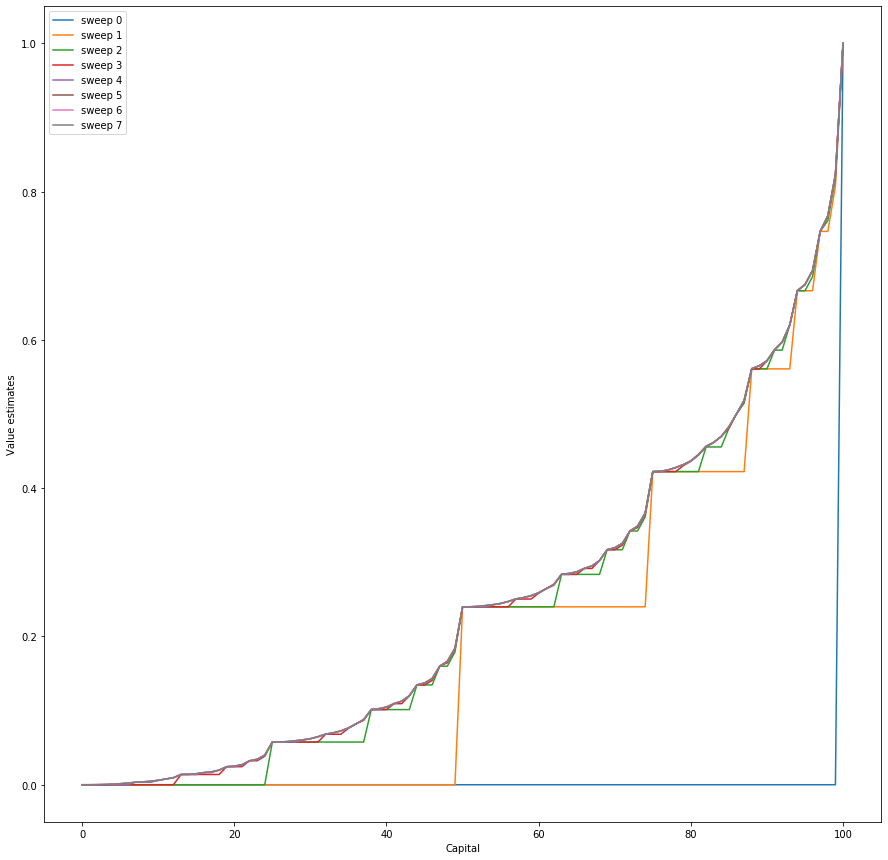

In [20]:
plt.figure(figsize=(15, 15))

for sweep, state_value in enumerate(H_1):
    plt.plot(state_value, label='sweep {}'.format(sweep))
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='best')
plt.show()

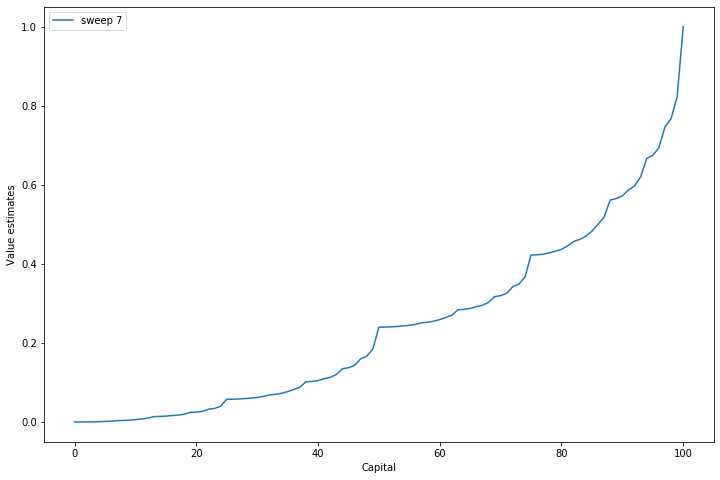

In [21]:
plt.figure(figsize=(12, 8))

for sweep, state_value in enumerate(H_1):
    x = state_value
    y = sweep

plt.plot(x, label='sweep {}'.format(y))
plt.plot()
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='best')

plt.show()

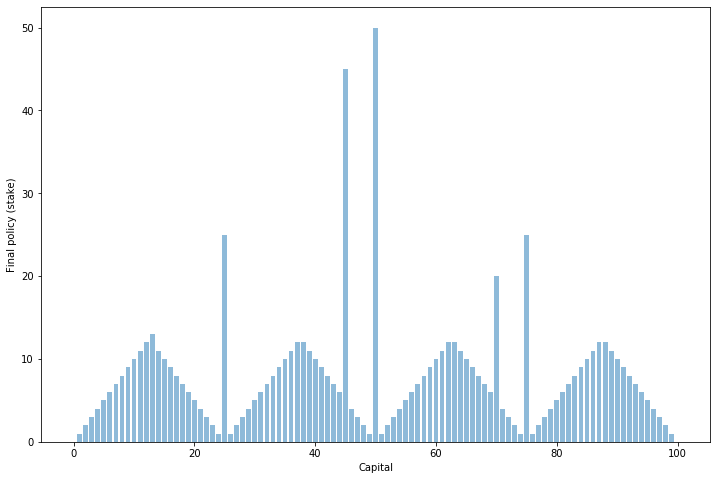

In [22]:
plt.figure(figsize=(12, 8))
plt.bar(STATES, P_1, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')


plt.show()
